# Introduction  
I built a linear algebra library from scratch using the programming langage C++.  The library can perform matrix arithmetic operations, some statistics, and other matrix transformations. I implemented in the library, algorithms such as, householder reflections, the QR algorithm, the Singular Value Decompostion, etc. I also implemented the Principal Components Analysis (computation by SVD). I call the library *libLinearAlg* 

In this tutorial, I show how to use libLinearAlg, then  I compare the  PCA results  obtained by using python and my cpp library. 

To use it, there is nothing to install :

* The source code can be downloaded from my github repo: https://github.com/sowb/lib-linear-alg/archive/refs/heads/master.zip

* Or run  `git clone https://github.com/sowb/lib-linear-alg.git` on the terminal. 

Make sure that your working directory is the folder lib-linear-alg/examples/

## Perform PCA on the dataset using python                                          

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# load iris
iris = datasets.load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)  # PCA in 2 dimensions
components = pca.fit_transform(iris_scaled)

print("\nSingular values: ", pca.singular_values_)
print("\nExplained variance: ", pca.explained_variance_ratio_)

python_pca = pd.DataFrame(data=components, columns=["dim_1", "dim_2"])
python_pca.head()  # 5 first rows


Singular values:  [20.92306556 11.7091661 ]

Explained variance:  [0.72962445 0.22850762]


,dim_1,dim_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


## Perform PCA using libLinearAlg on C++

* Download the iris dataset 

In [17]:
iris = datasets.load_iris()

# download the data in a csv file
pd.DataFrame(iris.data).to_csv("iris.data", header = False, index = False)

* The cpp file to perform this task is examples/pca-iris.cpp. This file load, print the data; and perform PCA, save the results in a csv file. The code be compiled on a linux or windows terminal, as shown below.   

pca-iris.cpp : 

```cpp
#include <iostream>                                                              
#include <string>  
#include "../include/matrix.h"  

using namespace std;                                                             

int main()                                                                       
{                                                                                
     //Load the iris data                                                         
     Matrix Iris("iris.data", ",", false);                                        

     // Check dim
     print("\nThe dataset dimension");
     Iris.shape();                                                                

     // Print the data                                                            
     Iris.head(5);                                                                

     // Scale the data, perform PCA                                               
     Iris = scale(Iris, "col");                                                   

     Matrix Comp, Z, ExpVar;                                                      
     PCA(Iris, &Comp, &Z, &ExpVar, 2);                                            

     //Print the results                                                          
     print("\nPrincipal components");                                             
     Comp.head(5);                                                                
     Z.print("Singular Values");                                                  
     ExpVar.print("Explained variance");                                          

     // Save the results                                                          
     Comp.to_csv("iris-pc.csv");                                                  
     Z.to_csv("iris-sing-vals.csv");                                              
     ExpVar.to_csv("iris-exp-var.csv");                                           

     return 0;                                                                    
}                                                                                
```        

#### Compile the cpp file on linux 

In [18]:
%%bash
cd examples
g++ -std=c++11 pca-iris.cpp ../lib-unix/libLinearAlg.a && ./a.out


The dataset dimension
(nb_rows, nb_cols) = (150, 4)
5 first rows:
      5.10       3.50       1.40       0.20 
      4.90          3       1.40       0.20 
      4.70       3.20       1.30       0.20 
      4.60       3.10       1.50       0.20 
         5       3.60       1.40       0.20 

Principal components
5 first rows:
      2.26      -0.48 
      2.08       0.67 
      2.36       0.34 
      2.30       0.60 
      2.39      -0.65 
Singular Values
     20.92      11.71 
Explained variance
      0.73       0.23 


bash: line 1: cd: examples: No such file or directory


### Compile the cpp file on windows

```bash
cd examples
g++ -std=c++11 /path/pca-iris.cpp ../lib-windows/libLinearAlg.lib 
./a.exe
```

> We obtain almost same results from both, sklearn and libLinearAlg. The only difference is that the results obtained by libLinearAlg is multiplied by a negative sign (no big deal !)

# Visualization of the results obained by using python and C++ (using matplotlib)

First I plot the principal components obtained by using sklearn. Then I  import in python  and plot the PC  obtained by my C++ library. The point of doing this is to check if I get the same results.  

### Visualization of the results obtained by python 

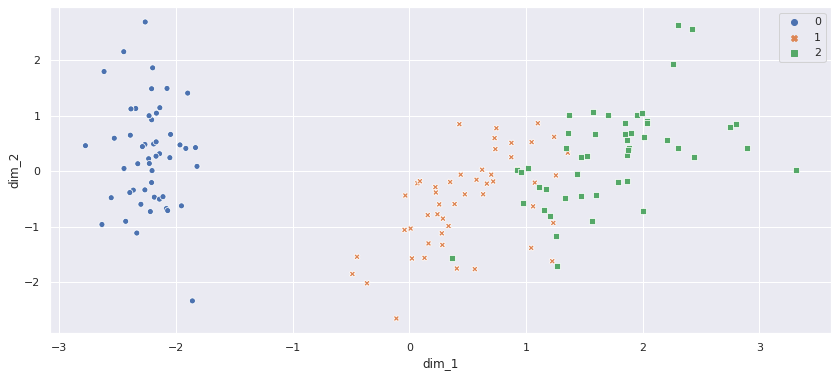

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [14, 6]
sns.set()

sns.scatterplot(
    data=python_pca,
    x="dim_1",
    y="dim_2",
    hue=iris.target,
    palette="deep",
    style=iris.target,
)
plt.show()

### Visualization of the results obtained my cpp library

In [5]:
cpp_pca = pd.read_csv("iris-pc.csv", header=None)
sns.scatterplot(
    cpp_pca.iloc[:, 0],
    cpp_pca.iloc[:, 1],
    hue=iris.target,
    palette="deep",
    style=iris.target,
)
plt.show()

ValueError: array length 150 does not match index length 151

> __Conclusion__ : We obtain the same results using sklearn or my cpp library.   The only difference between the 2 plots is the position of the points, if we multiply by -1 `cpp_pca` we obtain the same plots. 

In [7]:
import os

In [8]:
os.getcwd()

'/home/bouba/lib-linear-alg/examples'

In [10]:
cpp_pca

,0,1
0,-1.854480,-7.142380
1,-2.715230,0.545882
2,-2.565820,-0.484300
3,-2.763970,-0.220805
4,-2.691530,-0.455707
...,...,...
146,2.383480,0.296200
147,2.123720,-0.788487
148,2.122260,0.231651
149,2.074340,0.775761
